In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mplfinance

import mplfinance as mpf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
df_1h = pd.read_csv("/content/BTC_2019_2022_1h.csv")

In [ ]:
df_1h['Datetime'] = pd.to_datetime(df_1h['datetime'],format='%d-%m-%Y %H:%M')

In [ ]:
df_1h['Open']=df_1h['open']
df_1h['High']=df_1h['high']
df_1h['Low']=df_1h['low']
df_1h['Close']=df_1h['close']
df_1h['Volume']=df_1h['volume']
df_1h.drop(columns=['datetime','open','high','low','close','volume'],inplace=True)

In [ ]:
df_1h.head()

,,Datetime,Open,High,Low,Close,Volume
0,0.0,2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002
1,1.0,2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000
2,2.0,2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659
3,3.0,2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271
4,4.0,2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759


In [ ]:
df_1h.set_index('Datetime', inplace=True)
df=df_1h.resample('4h').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

In [ ]:
print(df.head())
print(df.tail())

                         Open      High       Low     Close    Volume
Datetime                                                             
2019-09-08 16:00:00  10000.00  10357.53  10000.00  10340.12   471.661
2019-09-08 20:00:00  10340.12  10412.65  10324.77  10391.63  2624.630
2019-09-09 00:00:00  10391.63  10391.63  10267.37  10297.89   779.449
2019-09-09 04:00:00  10297.89  10316.34  10092.71  10149.47  2664.789
2019-09-09 08:00:00  10149.47  10475.54  10077.22  10414.60  2466.485
                        Open     High      Low    Close     Volume
Datetime                                                          
2022-12-31 04:00:00  16549.0  16565.6  16530.0  16564.4  15304.144
2022-12-31 08:00:00  16564.4  16581.8  16538.0  16565.6  18890.316
2022-12-31 12:00:00  16565.5  16640.0  16546.2  16586.0  37418.928
2022-12-31 16:00:00  16586.1  16609.3  16562.0  16564.3  15398.520
2022-12-31 20:00:00  16564.3  16569.7  16461.8  16537.6  31497.886


In [ ]:
df.reset_index(inplace=True)

In [ ]:
class Bollingerplot:
    def __init__(self,data,window=20):
        self.df = pd.DataFrame(data)
        self.df.set_index('Datetime',inplace=True)
        self.window=window
        self.bollinger_bands()

    def bollinger_bands(self):
        self.df['20MA'] = self.df['Close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA']+2*self.df['Close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA']-2*self.df['Close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self, title='Candlestick Chart with Bollinger Bands', style='yahoo', figsize=(12, 8)):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=title, style=style, figsize=figsize)

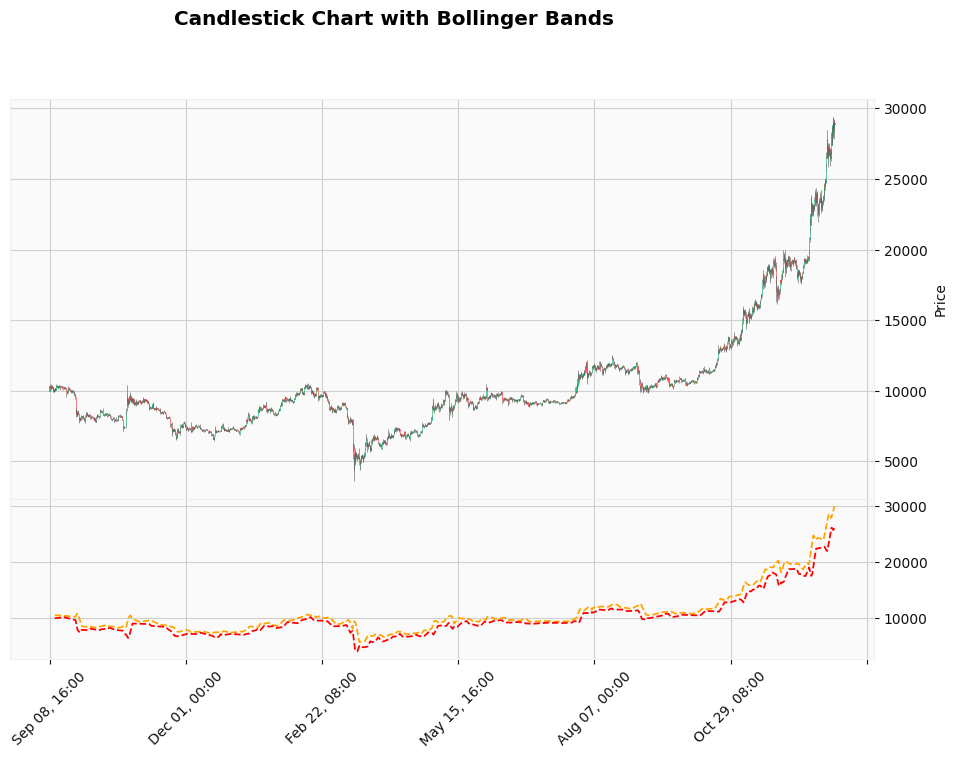

In [ ]:
bp=Bollingerplot(df[(df['Datetime'].dt.year==2019) | (df['Datetime'].dt.year==2020 )])
bp.plot_candlestick_chart()

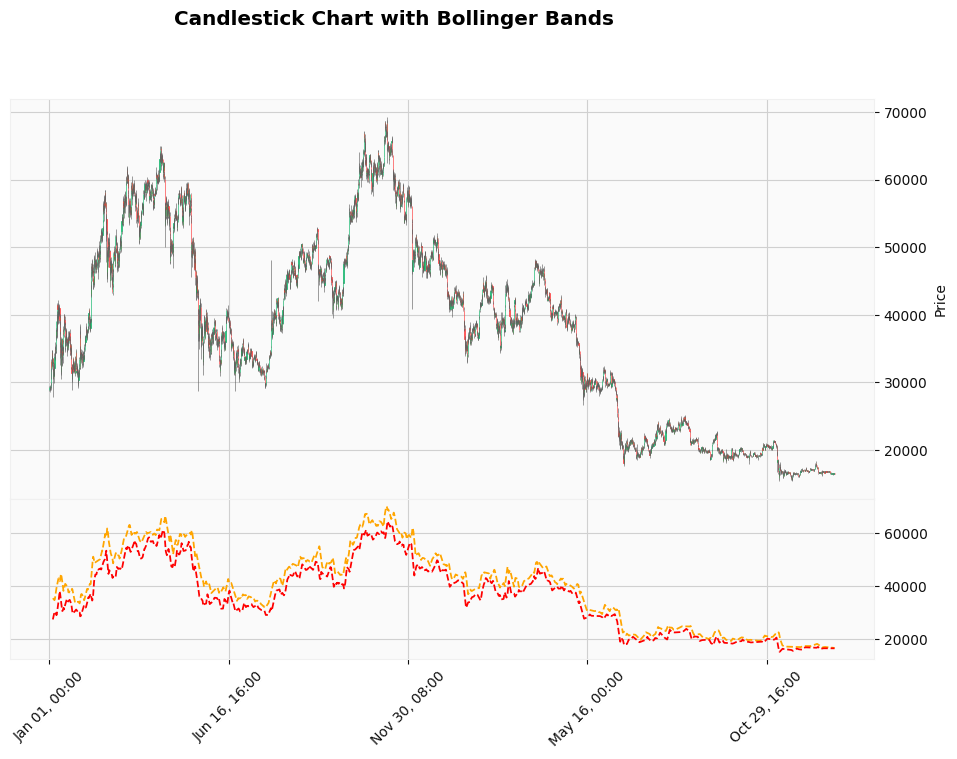

In [ ]:

bp=Bollingerplot(df[(df['Datetime'].dt.year==2021) | (df['Datetime'].dt.year==2022 )])
bp.plot_candlestick_chart()

In [ ]:
df.set_index('Datetime', inplace=True)

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Std'] = df['Daily_Return'].rolling(window=20).std()
df['Daily_Return'].fillna(df['Daily_Return'].mean(), inplace=True)
df['Rolling_Std'].fillna(df['Rolling_Std'].mean(), inplace=True)
df['Cumulative_Return'] = (df['Daily_Return'] + 1).cumprod()
avg_daily_return = df['Daily_Return'].mean()
std_dev = df['Daily_Return'].std()
sharpe_ratio = avg_daily_return / std_dev
print(sharpe_ratio)

0.011929745822706846


<Axes: title={'center': 'Daily Returns'}, xlabel='Datetime'>

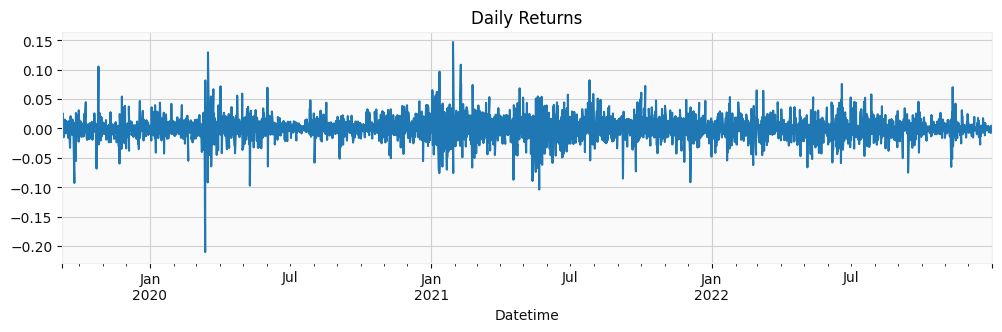

In [ ]:
plt.figure(figsize=(12,3))
df['Daily_Return'].plot(title='Daily Returns')


<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Datetime'>

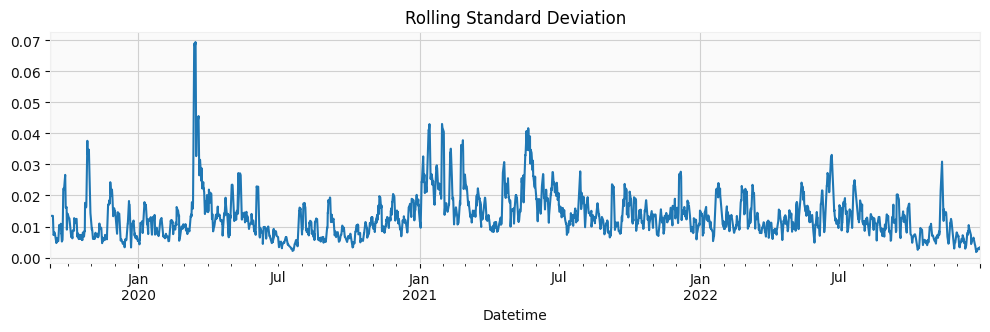

In [ ]:
plt.figure(figsize=(12,3))
df['Rolling_Std'].plot(title='Rolling Standard Deviation')

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Datetime'>

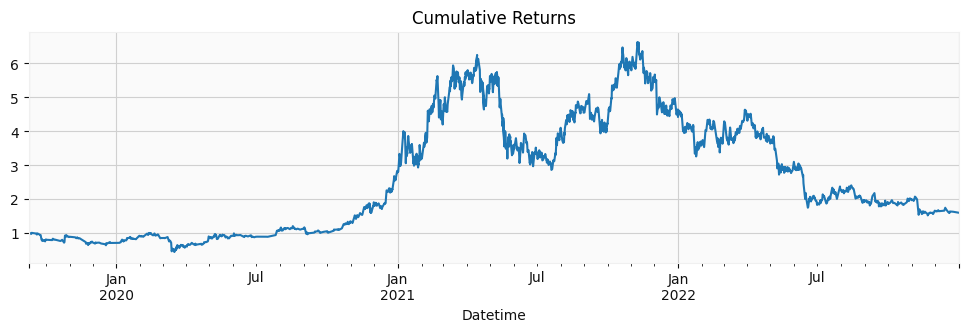

In [ ]:
plt.figure(figsize=(12,3))
df['Cumulative_Return'].plot(title='Cumulative Returns')

In [ ]:
r=df['Daily_Return']
ann_return=np.mean(r)*365
ann_vol=np.std(r)*np.sqrt(365)
print("annual return:",ann_return*100,'%')
print("annual volatility:",ann_vol*100,'%')
print("sharpe ratio:",ann_return/ann_vol,)

annual return: 6.664402034944655 %
annual volatility: 29.238403927641027 %
sharpe ratio: 0.22793316801552047


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Daily_Return,Rolling_Std,Cumulative_Return
count,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000
mean,26926.488182,27232.598988,26600.003419,26927.422205,60074.000071,0.000183,0.013442,2.604645
std,17361.517875,17574.317511,17134.077854,17360.771517,53143.854187,0.015305,0.007371,1.679279
min,4552.990000,4940.000000,3621.810000,4553.390000,471.661000,-0.210455,0.001798,0.440442
25%,9994.185000,10100.345000,9884.077500,9994.250000,27167.834000,-0.005622,0.008592,0.966727
50%,20792.650000,21043.300000,20608.000000,20792.700000,45293.580000,0.000143,0.012001,2.011243
75%,41609.567500,42082.055000,41194.830000,41609.592500,75584.443750,0.005925,0.016169,4.024827
max,68563.990000,69198.700000,67654.420000,68563.980000,996111.854000,0.147339,0.069418,6.632080


In [ ]:
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_C=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    return df_C

In [ ]:
df=clip_outliers(df,'Volume')
df=clip_outliers(df,'Daily_Return')
df=clip_outliers(df,'Rolling_Std')

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Daily_Return,Rolling_Std,Cumulative_Return
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,26341.475259,26575.760991,26103.165992,26346.766866,46312.823536,0.000211,0.011627,2.548479
std,17696.395636,17877.298774,17513.353109,17699.164977,29814.104071,0.008112,0.004751,1.712011
min,5851.380000,5927.000000,5726.790000,5838.910000,471.661000,-0.021341,0.001798,0.564788
25%,9739.772500,9800.000000,9667.250000,9730.942500,24019.987000,-0.004437,0.007978,0.941258
50%,19796.600000,19933.150000,19667.300000,19803.800000,39137.444000,0.000154,0.011273,1.915589
75%,41952.365000,42335.575000,41615.475000,41920.115000,61273.730000,0.004737,0.014406,4.054863
max,68563.990000,68675.160000,67654.420000,68563.980000,148075.530000,0.021754,0.025383,6.632080


In [ ]:
r=df['Daily_Return']
ann_return=np.mean(r)*365
ann_vol=np.std(r)*np.sqrt(365)
print("annual return:",ann_return*100,'%')
print("annual volatility:",ann_vol*100,'%')
print("sharpe ratio:",ann_return/ann_vol,)

annual return: 7.709572305277043 %
annual volatility: 15.496527498211385 %
sharpe ratio: 0.49750321845761153


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Datetime'>

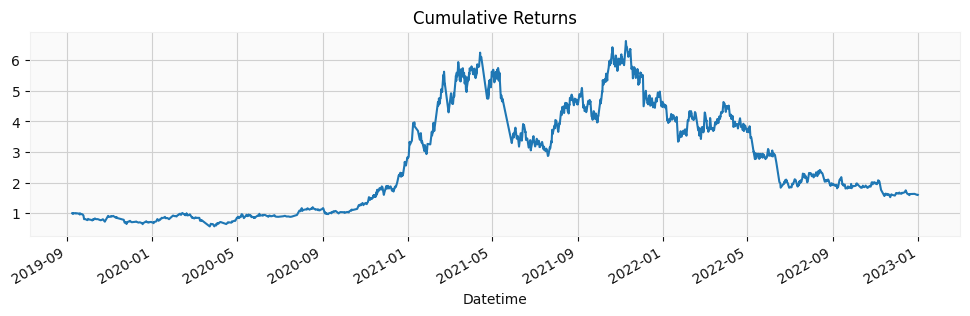

In [ ]:
plt.figure(figsize=(12,3))
df['Cumulative_Return'].plot(title='Cumulative Returns')

In [ ]:
def heikin_ashi(df):
    ha_df = df.copy()
    ha_df['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
    ha_df['HA_Open'] = 0.0
    ha_df['HA_Open'].iloc[0] = df['Open'].iloc[0]  # Initialize first HA Open

    for i in range(1, len(df)):
        ha_df['HA_Open'].iloc[i] = (ha_df['HA_Open'].iloc[i-1] + ha_df['HA_Close'].iloc[i-1]) / 2

    ha_df['HA_High'] = ha_df[['HA_Open', 'HA_Close', 'High']].max(axis=1)
    ha_df['HA_Low'] = ha_df[['HA_Open', 'HA_Close', 'Low']].min(axis=1)

    return ha_df[['HA_Open', 'HA_High', 'HA_Low', 'HA_Close']]
df[['HA_Open', 'HA_High', 'HA_Low', 'HA_Close']] = heikin_ashi(df)

In [ ]:
def RSI(df,w=14):
  w = int(w)
  delta = df['HA_Close'].diff()
  gain = delta.where(delta>0,0)
  loss = -delta.where(delta<0,0)

  avg_gain = gain.rolling(window=w,min_periods=1).mean()
  avg_loss = loss.rolling(window=w,min_periods=1).mean()
  rs = avg_gain / avg_loss
  rsi = 100 - (100/(1+rs))
  return np.array(rsi)

df['rsi'] = RSI(df)

In [ ]:
def sto(df, w=14):
    l= df['HA_Low'].rolling(window=w,min_periods=1).min()
    h=df['HA_High'].rolling(window=w,min_periods=1).max()
    df['%k']=100*(df['HA_Close']-l)/(h-l)
    df['%d'] = df['%k'].rolling(window=3,min_periods=1).mean()
    df=df.drop(columns=['%k'])
    return df
df=sto(df)

In [ ]:
def wr(df, w=14):
    l= df['HA_Low'].rolling(window=w,min_periods=1).min()
    h=df['HA_High'].rolling(window=w,min_periods=1).max()
    wr=(-100)*(h-df['HA_Close'])/(h-l)
    #df['%d'] = df['%k'].rolling(window=3,min_periods=1).mean()
    return np.array(wr)
df['w%r']=wr(df)

In [ ]:
def macd(df,fast=14,slow=26):
  df['ema_f']=df['HA_Close'].ewm(span=fast).mean()
  df['ema_s']=df['HA_Close'].ewm(span=slow).mean()
  macd=df['ema_f']-df['ema_s']
  return np.array(macd)
def macd_signal(df,fast=14,slow=26,w=9):
  ema_f=df['HA_Close'].ewm(span=fast).mean()
  ema_s=df['HA_Close'].ewm(span=slow).mean()
  macd=ema_f-ema_s
  signal=macd.ewm(span=w).mean()
  return np.array(signal)
df['macd']=macd(df)
df['macd_signal']=macd_signal(df)

In [ ]:
def vwap(df):
  vwap=np.cumsum(df['HA_Close']*df['Volume'])/np.cumsum(df['Volume'])
  return np.array(vwap)
df['vwap']=vwap(df)

In [ ]:
def bands(df,w=20,multiplier=2):
  sma=df['HA_Close'].rolling(window=w).mean()
  std=df['HA_Close'].rolling(window=w).std()
  upper=sma+(std*multiplier)
  lower=sma-(std*multiplier)
  return np.array(upper),np.array(lower)
df['upper'],df['lower']=bands(df)

In [ ]:
df.dropna(inplace=True)

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas_ta as ta

In [ ]:
def calculate_indicators(df):
    """ Calculate ADX and ATR indicators using pandas_ta. """
    # Calculate ADX
    df['ADX']=ta.adx(df['HA_High'],df['HA_Low'],df['HA_Close'])['ADX_14']
    df['ADX_15'] = ta.adx(df['HA_High'], df['HA_Low'], df['HA_Close'],length=15)['ADX_15']
    df['ADX_25'] = ta.adx(df['HA_High'], df['HA_Low'], df['HA_Close'],length=25)['ADX_25']
    # Calculate ATR (14 period by default)
    df['ATR'] = ta.atr(df['HA_High'], df['HA_Low'], df['HA_Close'])

    return df
df=calculate_indicators(df)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Daily_Return,Rolling_Std,Cumulative_Return,HA_Open,HA_High,...,%d,w%r,ema_f,ema_s,macd,macd_signal,upper,lower,ADX,ATR
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-09-12 00:00:00,10163.06,10205.46,10085.88,10113.43,2704.325,-0.004540,0.009306,0.978255,10081.353895,10205.46,...,39.857336,-51.961908,10128.947148,10154.354054,-25.406907,-22.628640,10427.470032,9956.903718,NaN,NaN
2019-09-12 04:00:00,10116.97,10129.19,10042.12,10078.96,2502.598,-0.003408,0.009208,0.974921,10111.655697,10129.19,...,44.561703,-58.388481,10123.737478,10148.572653,-24.835175,-23.074055,10427.516541,9948.596959,NaN,NaN
2019-09-12 08:00:00,10079.76,10187.90,10076.95,10170.93,2531.512,0.009125,0.009320,0.983817,10101.732849,10187.90,...,48.206310,-45.030679,10124.454599,10146.785596,-22.330997,-22.924339,10401.339742,9950.933008,NaN,NaN
2019-09-12 12:00:00,10170.00,10365.15,10170.00,10326.58,2529.000,0.015303,0.009367,0.998873,10115.308924,10365.15,...,58.094294,-22.297958,10142.939374,10156.708768,-13.769394,-21.082478,10388.052532,9956.300468,NaN,NaN
2019-09-12 16:00:00,10327.25,10349.91,10239.42,10308.80,2724.169,-0.001722,0.007252,0.997153,10186.620712,10349.91,...,73.480574,-12.229640,10165.452713,10169.868161,-4.415448,-17.733255,10400.244568,9953.332682,NaN,NaN


<Axes: title={'center': 'ADX'}, xlabel='Datetime'>

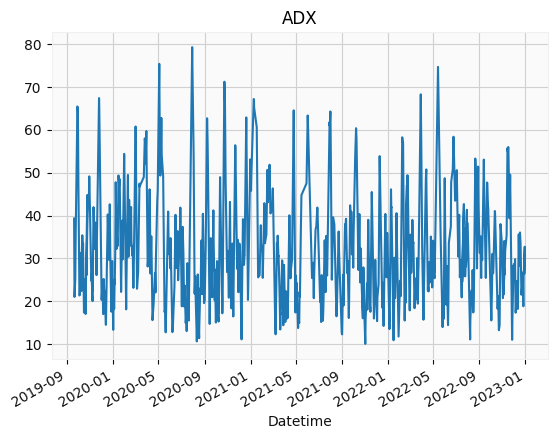

In [ ]:
df['ADX'].plot(title='ADX')

<Axes: title={'center': 'HA_Close'}, xlabel='Datetime'>

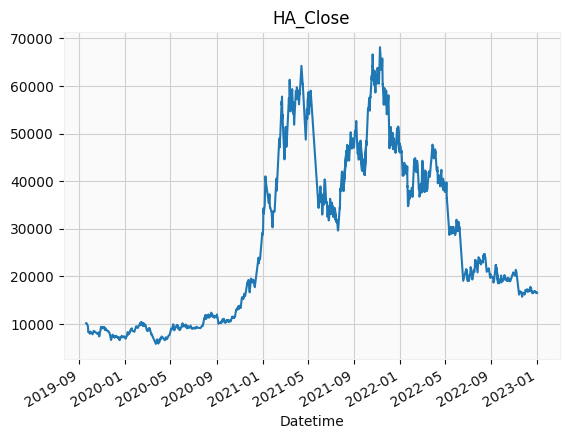

In [ ]:
df['HA_Close'].plot(title='HA_Close')

In [ ]:
def apply_strategy(df, atr_multiplier=1.5):
    ha_df = heikin_ashi(df)

    # Step 2: Replace OHLC with Heikin-Ashi values
    df[['Open', 'High', 'Low', 'Close']] = ha_df.rename(columns={
        'HA_Open': 'Open',
        'HA_High': 'High',
        'HA_Low': 'Low',
        'HA_Close': 'Close'
    })

    # Step 3: Calculate ADX and ATR indicators
    df = calculate_indicators(df)

    # Step 4: Initialize Signal, Stop Loss, and Take Profit columns
    df['Signal'] = 0
    df['Stop_Loss'] = None
    df['Take_Profit'] = None

    # Step 5: Track positions (0 = no position, 1 = long, -1 = short)
    position = 0
    stop_loss = 0
    take_profit = 0

    # Step 6: Strategy conditions for labeling signals
    for i in range(2, len(df)):
        atr_value = df['ATR'].iloc[i]  # Get the current ATR value

        # Check if Stop-Loss or Take-Profit is hit before making any new entries
        if position == 1:  # Long position
            if df['Low'].iloc[i] <= stop_loss:
                df['Signal'].iloc[i] = -1  # Long Exit due to Stop-Loss
                position = 0
            elif df['High'].iloc[i] >= take_profit:
                df['Signal'].iloc[i] = -1  # Long Exit due to Take-Profit
                position = 0

        elif position == -1:  # Short position
            if df['High'].iloc[i] >= stop_loss:
                df['Signal'].iloc[i] = -2  # Short Exit due to Stop-Loss
                position = 0
            elif df['Low'].iloc[i] <= take_profit:
                df['Signal'].iloc[i] = -2  # Short Exit due to Take-Profit
                position = 0

        # Long Entry: Two consecutive green Heikin-Ashi candles and strong trend (ADX > 27)
        if df['Close'].iloc[i-1] > df['Open'].iloc[i-1] and df['Close'].iloc[i-2] > df['Open'].iloc[i-2]:
            if df['ADX'].iloc[i] > 25 and position == 0:  # Ensure no position is open
                df['Signal'].iloc[i] = 1  # Long Entry
                position = 1  # Mark position as long

                # Calculate Stop Loss and Take Profit
                entry_price = df['Close'].iloc[i]
                stop_loss = entry_price - atr_multiplier * atr_value  # ATR-based stop loss
                take_profit = entry_price + atr_multiplier * atr_value  # ATR-based take profit

                df['Stop_Loss'].iloc[i] = stop_loss
                df['Take_Profit'].iloc[i] = take_profit

        # Long Exit: Exit when a red Heikin-Ashi candle appears while in long position
        elif position == 1 and df['Close'].iloc[i] < df['Open'].iloc[i]:
            df['Signal'].iloc[i] = -1  # Long Exit
            position = 0  # Reset position to no position

        # Short Entry: A green Heikin-Ashi candle followed by a red one and strong trend (ADX > 27)
        elif df['Close'].iloc[i-1] > df['Open'].iloc[i-1] and df['Close'].iloc[i] < df['Open'].iloc[i]:
            if df['ADX'].iloc[i] > 25 and position == 0:  # Ensure no position is open
                df['Signal'].iloc[i] = 2  # Short Entry
                position = -1  # Mark position as short

                # Calculate Stop Loss and Take Profit
                entry_price = df['Close'].iloc[i]
                stop_loss = entry_price - atr_multiplier * atr_value  # ATR-based stop loss for short
                take_profit = entry_price + (atr_multiplier+0.5) * atr_value  # ATR-based take profit for short

                df['Stop_Loss'].iloc[i] = stop_loss
                df['Take_Profit'].iloc[i] = take_profit

        # Short Exit: Exit when a green Heikin-Ashi candle appears while in short position
        elif position == -1 and df['Close'].iloc[i] > df['Open'].iloc[i]:
            df['Signal'].iloc[i] = -2  # Short Exit
            position = 0  # Reset position to no position

    return df


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np

def calculate_compound_statistics(df, initial_capital=10000):
    # Ensure the Signal column exists
    if 'Signal' not in df.columns:
        raise ValueError("The DataFrame must contain a 'Signal' column.")

    # Step 1: Create a 'Position' column based on 'Signal'
    df['Position'] = df['Signal'].replace({1: 1, 2: -1, -1: -1, -2: 1}).ffill().fillna(0)

    # Step 2: Calculate Daily Returns
    df['Daily_Return'] = df['Close'].pct_change()

    # Step 3: Calculate Strategy Returns
    df['Strategy_Return'] = df['Daily_Return'] * df['Position'].shift(1)

    # Step 4: Calculate Compound Strategy Returns and Equity Curve
    df['Equity'] = initial_capital * (1 + df['Strategy_Return']).cumprod()
    df['Equity'].iloc[0] = initial_capital  # Set the initial equity value
    df['Cumulative_Returns'] = df['Equity'] / initial_capital - 1  # Compound cumulative returns

    # Step 5: Calculate number of trades
    num_trades = ((df['Signal'] != 0).sum()) / 2  # Each trade involves an entry and an exit

    # Step 6: Calculate final equity and total return
    final_equity = df['Equity'].iloc[-1]
    total_return = (final_equity / initial_capital - 1) * 100  # Total return in percentage

    # Step 7: Calculate max drawdown
    df['Cumulative_High'] = df['Equity'].cummax()
    df['Drawdown'] = df['Equity'] / df['Cumulative_High'] - 1
    max_drawdown = df['Drawdown'][700:].min()

    # Step 8: Calculate Sharpe Ratio
    # Assuming a risk-free rate of 0 for simplicity
    risk_free_rate = 0
    sharpe_ratio = (df['Strategy_Return'].mean() - risk_free_rate) * np.sqrt(365) / df['Strategy_Return'].std()

    # Step 9: Print the statistics
    print(f"Number of Trades: {num_trades:.0f}")
    print(f"Final Equity: ${final_equity:.2f}")
    print(f"Total Return (%): {total_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

    return num_trades, final_equity, total_return, sharpe_ratio, max_drawdown

# Example usage after applying your strategy
df_btc=apply_strategy(df)
num_trades, final_equity, total_return, sharpe_ratio, max_drawdown = calculate_compound_statistics(df_btc)


Number of Trades: 496
Final Equity: $146309.33
Total Return (%): 1363.09%
Sharpe Ratio: 2.78
Max Drawdown: -4.75%


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Datetime'>

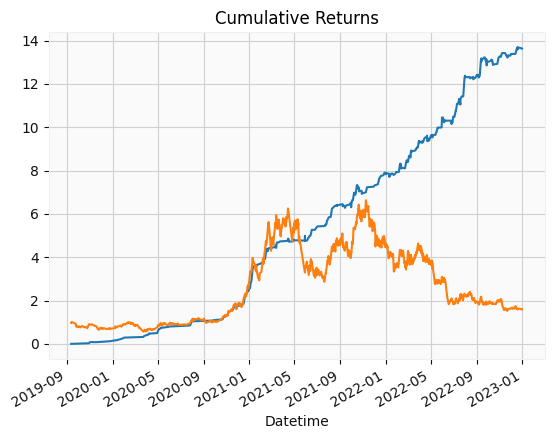

In [ ]:
df['Cumulative_Returns'].plot(title='Cumulative Returns')
df['Cumulative_Return'].plot(title='Cumulative Returns')

Number of Trades: 103
Total Return (%): 32.50%
Sharpe Ratio: 0.47


Net PnL (Static): 155569.99999999997
Max Drawdown (Static %): 0
Net PnL (Compounding): 2.323588307306714e+38
Max Drawdown (Compounding %): 0
Time taken: 6.453574180603027
